In [ ]:
### Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

In [10]:
from sklearn.datasets import load_breast_cancer

In [146]:
breast_cancer = load_breast_cancer()

In [179]:
type(breast_cancer)

sklearn.utils.Bunch

In [107]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [148]:
print(f"Dimension of data : {breast_cancer.data.shape},\nDimension of label : {breast_cancer.target.shape}")

Dimension of data : (569, 30),
Dimension of label : (569,)


In [180]:
breast_cancer.target.shape

(569,)

In [77]:
from sklearn.preprocessing import StandardScaler

In [149]:
raw_data = breast_cancer.data

# normalized data
normalized_data = StandardScaler().fit_transform(raw_data)

# initialize pca with 2 components
pca = PCA(n_components=2)

# fit data
pca_data = pca.fit_transform(normalized_data)

In [160]:
# Variance explained by principal components
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [174]:
# Total Variance explained by princila components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 2 principal components')

63.2% of total variance is explained by 2 principal components


In [175]:
# Create dataframe 
pca_df = pd.DataFrame(np.vstack((pca_data.T, breast_cancer.target)).T,
                      columns = ['1st_Prin', '2nd_Prin', 'label'])

In [176]:
# Replace 0 with Malignant
pca_df['label'].replace(0.0, 'Malignant',inplace=True)

# Replace 1 with Benign
pca_df['label'].replace(1.0, 'Benign',inplace=True)

In [177]:
# Check the count of label
pca_df.label.value_counts()

Benign       357
Malignant    212
Name: label, dtype: int64

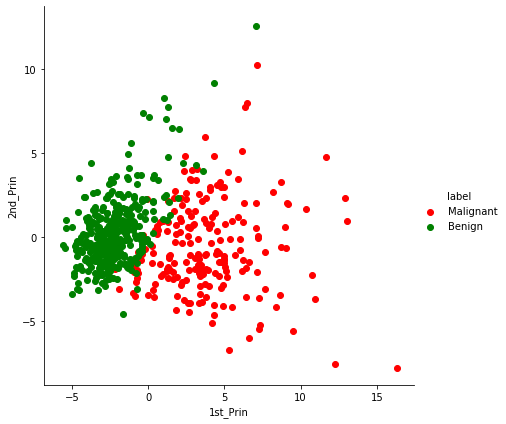

In [178]:
# Create Plot 

# Set palette
pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(pca_df, hue='label', height=6, palette=pal, 
                   hue_order=["Malignant", "Benign"]).\
     map(plt.scatter, '1st_Prin', '2nd_Prin').\
     add_legend()

plt.show()